# WeatherPy
----

#### Note
* The notebook below selects 500+ cities randomly from citypy. The weather is called for those cities. For the cities for which there is data, a data frame is created that contains latitude and longitude for each city as well as the country that the city falls in, the max temperature, humidity, cloudiness as a percentage, wind speed, and the date that the information was collected.

* Using the information collected a number of scatter plot charts are produced showing the relationship between latitude and four vaiables: temperature, humidity, cloudiness, and wind speed. The cities are divided according to which hemisphere they call in and a linear regression analysis is done on the data sets for the same four variables. R-values are caluclualed and a brief analysis is described below.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        results = requests.get(city_url)
        city_weather = results.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | jurado
Processing Record 4 of Set 1 | ampanihy
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | gornyy
Processing Record 8 of Set 1 | chiriqui grande
Processing Record 9 of Set 1 | cefalu
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | tarakan
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | tamandare
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | srednekolymsk
Processing Record 23 of Set 1 | p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [4]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,84.18,72,75,16.11,US,1668983435
1,rikitea,-23.1203,-134.9692,66.24,90,100,11.74,PF,1668983435
2,jurado,7.1053,-77.7641,77.50,92,98,5.46,CO,1668983436
3,ampanihy,-24.7000,44.7500,70.12,77,96,11.70,MG,1668983436
4,busselton,-33.6500,115.3333,55.58,65,0,13.53,AU,1668983437


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#The code below wa created for the inital data set, but found not to be needed in later data sets. 
# I did a .loc to find any cities with humidity above 100 and removed that city from the data set.

# for humid in city_test:
# number = city_test.loc[city_test['Humidity'] > 100].index
# city_test.count()
# Get the indices of cities that have humidity over 100%.
# cities_clean_data = cty_test.loc[city_test['City_ID'] != 129]
# cities_clean_data.head()i
# cities_clean.to_csv('cities_clean.csv')
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# cities_clean_data.sort_values(['Lat'])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The following scatter chart illustrates plots the max temperature by latitude for the 500+ cities in the data set. Notice the shape of the points. Tempatures are highest at the equator and start falling as one moves either south or north. The large difference between the number of points north of the equaotr compared to those south of the equator can be explained by the fact that 71% of the earth's landmass lies north of the equator.

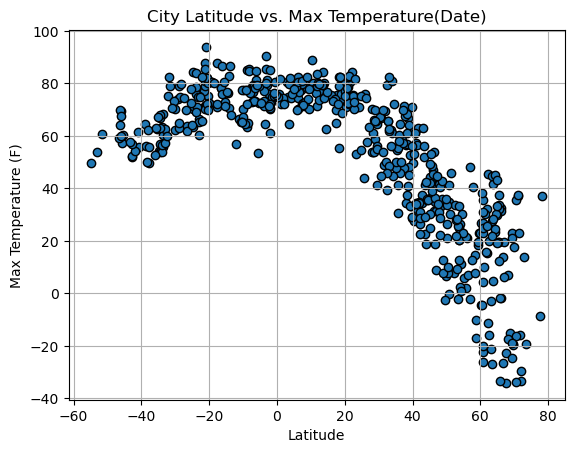

In [7]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor= 'black')
plt.title('City Latitude vs. Max Temperature(Date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

The chart below plots the relative humidity of the cities in the dataset by latitude. The majority of cities have a relative humidity of greater than 50%. The large cluster with humidity greater than 80% lie above the 40 degree North parallel. These numbers will vary according to time of year. This data has been collected in November 2022.

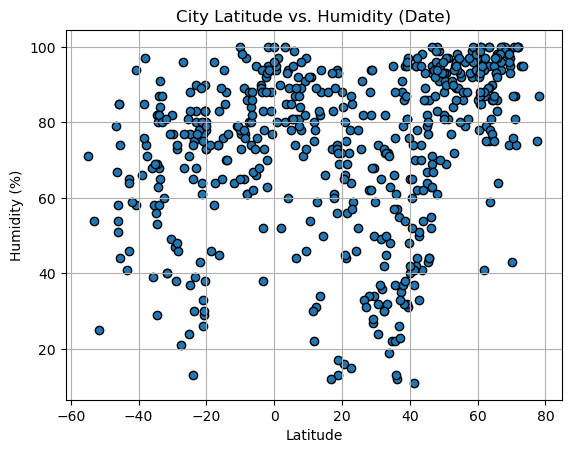

In [8]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (Date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

The scatter chart below shows cloudiness for the the data set accoring to latitude. The cluster at the top and bottom are most likely because these are the upper and lower bounds of the range.

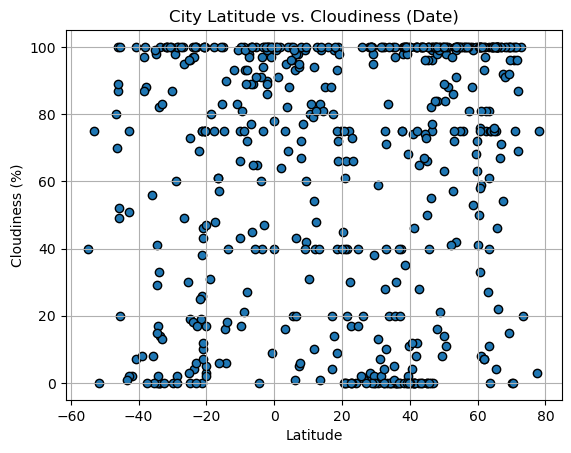

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (Date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

The chart below is for the same data set of cities and shows wind speed vs. latitude. Evident from the chart, we can see that wind speeds in excess of 20 mph are realtive rare for a large number of cities at once.

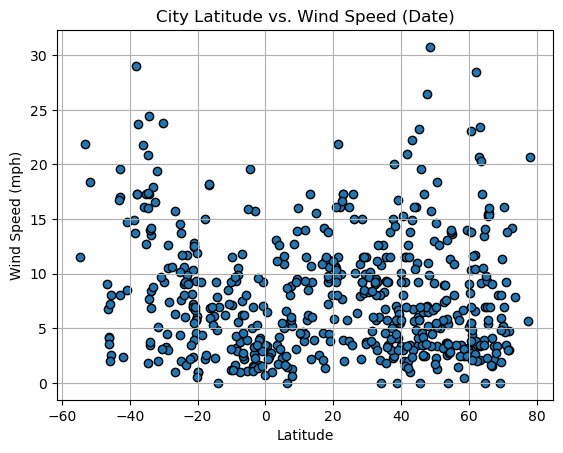

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (Date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

Dividing the data up by northern and southern hemispehere to examine the relationship between latitude and four vaiables: temperature, humidity, cloudiness, and wind speed. The charts below look at those variables in the two hemispheres, and runs a linear regression to see if there is a correlation. R-values for each chart are noted below.

In [13]:
north_hem = city_data_df.loc[city_data_df['Lat'] > 0]
south_hem = city_data_df.loc[city_data_df['Lat'] < 0]
north_hem.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,84.18,72,75,16.11,US,1668983435
2,jurado,7.1053,-77.7641,77.50,92,98,5.46,CO,1668983436
6,gornyy,55.1153,83.9059,5.72,92,100,13.62,RU,1668983438
7,chiriqui grande,8.9500,-82.1167,78.40,91,99,3.11,PA,1668983439
8,cefalu,38.0386,14.0229,56.53,79,98,20.00,IT,1668983439


In [14]:
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,66.24,90,100,11.74,PF,1668983435
3,ampanihy,-24.7000,44.7500,70.12,77,96,11.70,MG,1668983436
4,busselton,-33.6500,115.3333,55.58,65,0,13.53,AU,1668983437
5,ushuaia,-54.8000,-68.3000,49.62,71,40,11.50,AR,1668983438
9,vila velha,-20.3297,-40.2925,75.15,90,75,4.61,BR,1668983440


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The scatter plot below illustrates the max temperature by latitude for the cities in the data set that fall within the northern hemisphere. There is a very strong correlation between lattitude and temperature. Temperature drops as one travels north.

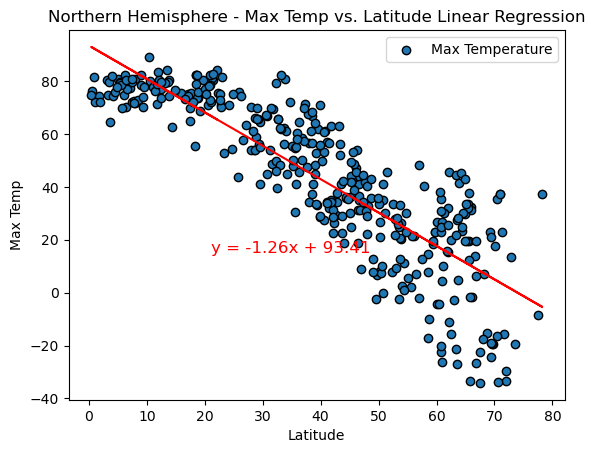

The r-value is -0.85


In [15]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Max Temp'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Max Temp'], edgecolors='black')
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (21, 15), fontsize=12, color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Max Temperature'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/scatter_reg1.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The scatter plot below illustrates the max temperature by latitude for the cities in the data set that fall within the southern hemisphere. This graph shows a moderate correlation between temperature and latitude. The fact that there are fewer data points and less landmass in the southern hemisphere may account for this. If Antarctica were heavily populated, there data would certainly show a much stronger correlation.

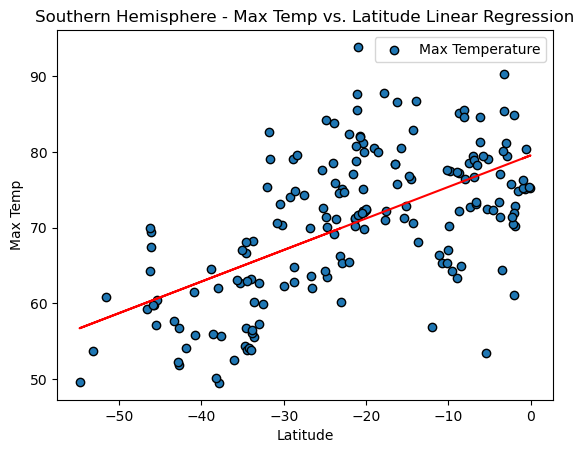

The r-value is 0.6


In [16]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Max Temp'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Max Temp'], edgecolors='black')
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-28, 40), fontsize=12, color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Max Temperature'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/scatter_reg2.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The two graphs below show a very weak correlation between humidity and latitude. Both have an r-value of close to 0.3 which is on the border of having no correlation at all.

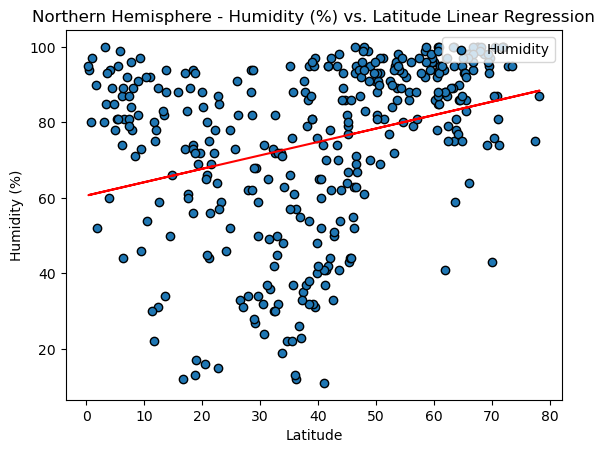

The r-value is 0.31


In [17]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Humidity'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Humidity'], edgecolors='black')
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (50, 5), fontsize=12, color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.legend(['Humidity'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/scatter_reg3.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

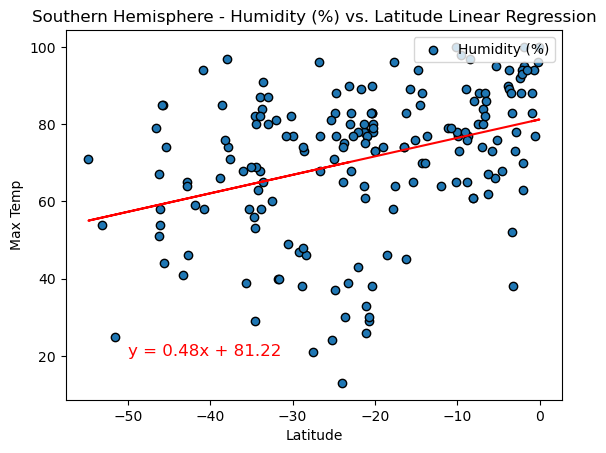

The r-value is 0.35


In [18]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Humidity'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Humidity'], edgecolors='black')
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-50, 20), fontsize=12, color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.legend(['Humidity (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/scatter_reg4.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

With r-values of .16 and .27 for the two graphs below, there is little to no correlation between cloudiness and latitude in either the northern or southern hemisphere.

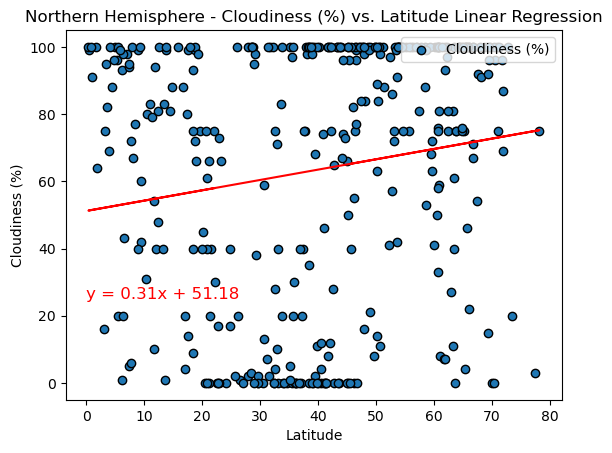

The r-value is 0.16


In [19]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Cloudiness'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], edgecolors='black')
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (0, 25), fontsize=12, color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.legend(['Cloudiness (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/scatter_reg5.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

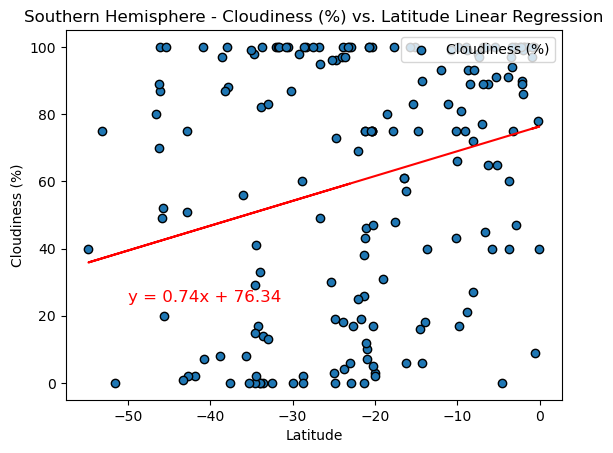

The r-value is 0.27


In [20]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Cloudiness'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Cloudiness'],edgecolors='black')
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-50, 24), fontsize=12, color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.legend(['Cloudiness (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/scatter_reg6.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between wind speed and latitude in the northern hemispehe, but looking at the second graph below shos a surprising difference.

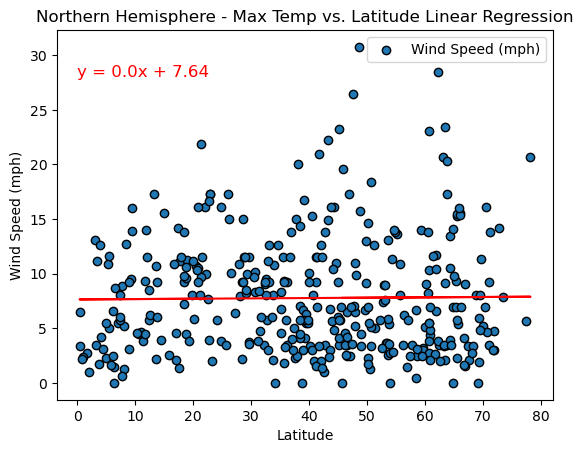

The r-value is 0.01


In [21]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Wind Speed'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], edgecolors='black')
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (0, 28), fontsize=12, color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Wind Speed (mph)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/scatter_reg7.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Although the correlation here is weak, there does to seem to be somewhat of a relationship between wind speed and latitude in the southern hemisphere. More data and study may reveal something more. The absence of landmass in large areas may account for some of this difference.

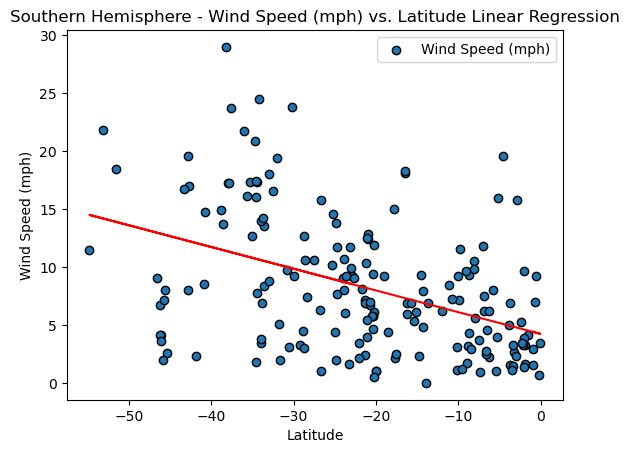

The r-value is -0.44


In [22]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Wind Speed'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], edgecolors='black')
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-28, 40), fontsize=12, color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.legend(['Wind Speed (mph)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/scatter_reg8.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')